## Process Files

In [28]:
# import functions
import re
import pandas as pd
import string
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tag import StanfordNERTagger
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD, SparsePCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning

df = pd.read_csv('/Users/jojoli/Documents/CMU/F24/Activities/HackCMU2024/Resume_Screening_nostop.csv')
df.head()
# print(type(re_featured['adj_tag'][0]))

,Unnamed: 0,Unnamed: 0.1,Category,Resume,cleaned_resume,tok_clean_content,nostop_clean_content,cleaned_nostop_text
0,0,0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...,"['skills', 'programming', 'languages', 'python...","['skills', 'programming', 'languages', 'python...",skills programming languages python pandas num...
1,1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E ...,"['education', 'details', 'may', '2013', 'to', ...","['education', 'details', 'may', '2013', 'may',...",education details may 2013 may 2017 b e uit rg...
2,2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...,"['areas', 'of', 'interest', 'deep', 'learning'...","['areas', 'interest', 'deep', 'learning', 'con...",areas interest deep learning control system de...
3,3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...,"['skills', 'r', 'python', 'sap', 'hana', 'tabl...","['skills', 'r', 'python', 'sap', 'hana', 'tabl...",skills r python sap hana tableau sap hana sql ...
4,4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad...,"['education', 'details', 'mca', 'ymcaust', 'fa...","['education', 'details', 'mca', 'ymcaust', 'fa...",education details mca ymcaust faridabad haryan...


In [29]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

## Feature extraction

### Text-based features

In [30]:
program_language = ['python', 'program', 'code', 'c', 'c++', 'javascript', 'web', 'r', 'java', 'C#']

def count_uniquewords(text):
    return len(set(str(text).split()))

def count_program(text):
    program = [word for word in str(text).split() if word.lower() in program_language]
    return len(program)

In [31]:
df['programming_count'] = df['cleaned_nostop_text'].apply(lambda x:count_program(x))

df.head(5)

,Category,Resume,cleaned_resume,tok_clean_content,nostop_clean_content,cleaned_nostop_text,programming_count
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...,"['skills', 'programming', 'languages', 'python...","['skills', 'programming', 'languages', 'python...",skills programming languages python pandas num...,11
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E ...,"['education', 'details', 'may', '2013', 'to', ...","['education', 'details', 'may', '2013', 'may',...",education details may 2013 may 2017 b e uit rg...,1
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...,"['areas', 'of', 'interest', 'deep', 'learning'...","['areas', 'interest', 'deep', 'learning', 'con...",areas interest deep learning control system de...,8
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...,"['skills', 'r', 'python', 'sap', 'hana', 'tabl...","['skills', 'r', 'python', 'sap', 'hana', 'tabl...",skills r python sap hana tableau sap hana sql ...,14
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad...,"['education', 'details', 'mca', 'ymcaust', 'fa...","['education', 'details', 'mca', 'ymcaust', 'fa...",education details mca ymcaust faridabad haryan...,3


## Train Model with Feature Engineering

### Sources: Scikit-learn

In [32]:
# Using TF-IDF
vectorizer = TfidfVectorizer()
text = vectorizer.fit_transform(df['nostop_clean_content']).toarray()
print(text.shape)

(962, 7451)


In [34]:
tfidf = pd.DataFrame(text)
targeted = df.Category
X_train, X_test, y_train, y_test = train_test_split(tfidf, targeted ,test_size=0.3, random_state=42)

### Random Forest

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       1.00      1.00      1.00         9
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       0.89      1.00      0.94        17
         DotNet Developer       1.00      1.00      1.00        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      1.00      1.00        17
                   Hadoop       1.00      1.00      1.00     

Text(0.5, 1.05, 'Confusion_matrix')

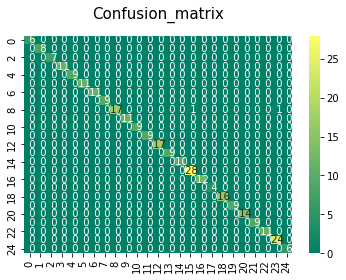

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

umodel1 = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
umodel1.fit(X_train, y_train)
y_pred_rm1 = umodel1.predict(X_test)
print(metrics.classification_report(y_pred_rm1, y_test))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Random Forest on test set: {:.8f}'.format(accuracy_score(y_pred_rm1, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred_rm1),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [36]:
df.to_csv("/Users/jojoli/Documents/CMU/F24/Activities/HackCMU2024/Resume_Screening_featured.csv")

## Save model

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       1.00      1.00      1.00         9
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       0.89      1.00      0.94        17
         DotNet Developer       1.00      1.00      1.00        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      1.00      1.00        17
                   Hadoop       1.00      1.00      1.00     

Text(0.5, 1.05, 'Confusion_matrix')

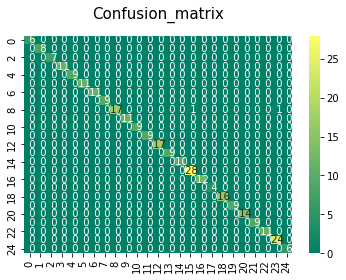

In [37]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/Users/jojoli/Documents/CMU/F24/Activities/HackCMU2024/ml_model_RF.sav'
pickle.dump(umodel1, open(filename, 'wb'))

# load the model
load_model = pickle.load(open(filename, 'rb'))

y_pred_4 = load_model.predict(X_test)
print(metrics.classification_report(y_pred_4, y_test))
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of Random Forest on test set: {:.8f}'.format(accuracy_score(y_pred_4, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred_4),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)